In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
from ast import literal_eval 
import scipy.stats as stats
%matplotlib inline

In [2]:
energy_2015=pd.read_csv('2015-building-energy-benchmarking.csv')
energy_2016=pd.read_csv('2016-building-energy-benchmarking.csv')


Dans un premier temps nous allons essayer d’assembler les deux Dataframe pour en faciliter le traitement, pour cela nous allons faire en sorte qu'ils ont le même nombre de colonnes, de même nom et de même type, de plus nous vérifieront que toutes les colonnes rapportent bien la même donnée pour chaque variable (unité , normalisation , nom des variables catégorielle) 

In [3]:
energy_2016.head()


,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,...,1.156514e+06,3946027.0,12764.52930,1276453.0,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,...,9.504252e+05,3242851.0,51450.81641,5145082.0,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,...,1.451544e+07,49526664.0,14938.00000,1493800.0,False,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,...,8.115253e+05,2768924.0,18112.13086,1811213.0,False,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,...,1.573449e+06,5368607.0,88039.98438,8803998.0,False,NaN,Compliant,NaN,505.01,2.88


In [4]:
energy_2015.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,Location,CouncilDistrictCode,Neighborhood,YearBuilt,...,GHGEmissionsIntensity(kgCO2e/ft2),DefaultData,Comment,ComplianceStatus,Outlier,2010 Census Tracts,Seattle Police Department Micro Community Policing Plan Areas,City Council Districts,SPD Beats,Zip Codes
0,1,2015,NonResidential,Hotel,MAYFLOWER PARK HOTEL,659000030,"{'latitude': '47.61219025', 'longitude': '-122...",7,DOWNTOWN,1927,...,2.64,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081
1,2,2015,NonResidential,Hotel,PARAMOUNT HOTEL,659000220,"{'latitude': '47.61310583', 'longitude': '-122...",7,DOWNTOWN,1996,...,2.38,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081
2,3,2015,NonResidential,Hotel,WESTIN HOTEL,659000475,"{'latitude': '47.61334897', 'longitude': '-122...",7,DOWNTOWN,1969,...,1.92,Yes,NaN,Compliant,NaN,NaN,56.0,NaN,31.0,18081
3,5,2015,NonResidential,Hotel,HOTEL MAX,659000640,"{'latitude': '47.61421585', 'longitude': '-122...",7,DOWNTOWN,1926,...,31.38,No,NaN,Compliant,High Outlier,NaN,56.0,NaN,31.0,18081
4,8,2015,NonResidential,Hotel,WARWICK SEATTLE HOTEL,659000970,"{'latitude': '47.6137544', 'longitude': '-122....",7,DOWNTOWN,1980,...,4.02,No,NaN,Compliant,NaN,NaN,56.0,NaN,31.0,19576


On verifie si les colonnes des deux dataset sont identiques sinon on traitera individuellement chaque difference

In [5]:
energy_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3376 entries, 0 to 3375
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    3376 non-null   int64  
 1   DataYear                         3376 non-null   int64  
 2   BuildingType                     3376 non-null   object 
 3   PrimaryPropertyType              3376 non-null   object 
 4   PropertyName                     3376 non-null   object 
 5   Address                          3376 non-null   object 
 6   City                             3376 non-null   object 
 7   State                            3376 non-null   object 
 8   ZipCode                          3360 non-null   float64
 9   TaxParcelIdentificationNumber    3376 non-null   object 
 10  CouncilDistrictCode              3376 non-null   int64  
 11  Neighborhood                     3376 non-null   object 
 12  Latitude            

In [6]:
energy_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3340 entries, 0 to 3339
Data columns (total 47 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   OSEBuildingID                                                  3340 non-null   int64  
 1   DataYear                                                       3340 non-null   int64  
 2   BuildingType                                                   3340 non-null   object 
 3   PrimaryPropertyType                                            3340 non-null   object 
 4   PropertyName                                                   3340 non-null   object 
 5   TaxParcelIdentificationNumber                                  3338 non-null   object 
 6   Location                                                       3340 non-null   object 
 7   CouncilDistrictCode                                         

On peut remarquer que l'année 2016 contient plus de données que l'année 2015

In [7]:
energy_2016.sort_values('OSEBuildingID')

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,...,1.156514e+06,3.946027e+06,12764.529300,1.276453e+06,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,...,9.504252e+05,3.242851e+06,51450.816410,5.145082e+06,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,...,1.451544e+07,4.952666e+07,14938.000000,1.493800e+06,False,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,...,8.115253e+05,2.768924e+06,18112.130860,1.811213e+06,False,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,...,1.573449e+06,5.368607e+06,88039.984380,8.803998e+06,False,NaN,Compliant,NaN,505.01,2.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371,50222,2016,Nonresidential COS,Office,Horticulture building,1600 S Dakota St,Seattle,WA,NaN,1624049080,...,1.536550e+05,5.242709e+05,3254.750244,3.254750e+05,True,NaN,Error - Correct Default Data,NaN,20.94,1.70
3372,50223,2016,Nonresidential COS,Other,International district/Chinatown CC,719 8th Ave S,Seattle,WA,NaN,3558300000,...,1.162210e+05,3.965461e+05,5537.299805,5.537300e+05,False,NaN,Compliant,NaN,32.17,2.01
3373,50224,2016,Nonresidential COS,Other,Queen Anne Pool,1920 1st Ave W,Seattle,WA,NaN,1794501150,...,5.252517e+05,1.792159e+06,39737.390630,3.973739e+06,False,NaN,Compliant,NaN,223.54,16.99
3374,50225,2016,Nonresidential COS,Mixed Use Property,South Park Community Center,8319 8th Ave S,Seattle,WA,NaN,7883603155,...,1.022480e+05,3.488702e+05,3706.010010,3.706010e+05,False,NaN,Compliant,NaN,22.11,1.57


In [8]:
len(energy_2015)

3340

In [9]:
#Création d'une liste montrant les variables du datafra:e de 2016 absente du dataframe de 2015
list(set(energy_2016.columns) - set(energy_2015.columns))

['State',
 'City',
 'Comments',
 'TotalGHGEmissions',
 'Address',
 'ZipCode',
 'Longitude',
 'Latitude',
 'GHGEmissionsIntensity']

In [10]:
#Création d'une liste montrant les variables du dataframe de 2015 absentes du dataframe de 2016
list(set(energy_2015.columns) - set(energy_2016.columns))

['Comment',
 'Zip Codes',
 'OtherFuelUse(kBtu)',
 'GHGEmissions(MetricTonsCO2e)',
 'Seattle Police Department Micro Community Policing Plan Areas',
 'SPD Beats',
 'GHGEmissionsIntensity(kgCO2e/ft2)',
 'Location',
 'City Council Districts',
 '2010 Census Tracts']

On peut remarquer que les collonnes du Dataset de 2016
   - 'ZipCode',
   - 'Comments',
   - 'GHGEmissionsIntensity',
   - 'TotalGHGEmissions'

Corresspondent au collonnes du dataset de 2015
   - 'Zip Codes',
   - 'Comment',
   - 'GHGEmissionsIntensity(kgCO2e/ft2)'
   - 'GHGEmissions(MetricTonsCO2e)',

On peut donc simplement les renommer



In [11]:
energy_2015.rename(columns={'Zip Codes' : 'ZipCode',
                           'Comment' : 'Comments',
                           'GHGEmissionsIntensity(kgCO2e/ft2)' : 'GHGEmissionsIntensity',
                           'GHGEmissions(MetricTonsCO2e)' : 'TotalGHGEmissions' } , inplace=True)

Les colonnes 
   - 'SPD Beats'
   - 'OtherFuelUse(kBtu)'
   - '2010 Census Tracts'
   - 'Seattle Police Department Micro Community Policing Plan Areas'
   - 'City Council Districts'
   

n'ayant pas d'equivalent dans le Dataframe de 2016 , on supprime ces colonnes afin d'eviter de baser notre modele sur des donnée innaccesible
   

In [12]:
energy_2015=energy_2015.drop(['SPD Beats','OtherFuelUse(kBtu)','2010 Census Tracts','Seattle Police Department Micro Community Policing Plan Areas','City Council Districts'],1)

C:\Users\pon\AppData\Local\Temp\ipykernel_16552\4144062156.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  energy_2015=energy_2015.drop(['SPD Beats','OtherFuelUse(kBtu)','2010 Census Tracts','Seattle Police Department Micro Community Policing Plan Areas','City Council Districts'],1)


La colonne 'location' de 2015 contient les informations contenue dans les colonnes 'lattitude' 'longitude' et 'adresse' de 2016 , on va donc scinder cette colonne et renommer les résultats afin de correspondre aux donnée de 2016

In [13]:
energy_2015['Location']

0       {'latitude': '47.61219025', 'longitude': '-122...
1       {'latitude': '47.61310583', 'longitude': '-122...
2       {'latitude': '47.61334897', 'longitude': '-122...
3       {'latitude': '47.61421585', 'longitude': '-122...
4       {'latitude': '47.6137544', 'longitude': '-122....
                              ...                        
3335    {'latitude': '47.59950256', 'longitude': '-122...
3336    {'latitude': '47.65752471', 'longitude': '-122...
3337    {'latitude': '47.61649845', 'longitude': '-122...
3338    {'latitude': '47.68396954', 'longitude': '-122...
3339    {'latitude': '47.68396954', 'longitude': '-122...
Name: Location, Length: 3340, dtype: object

In [14]:


energy_2015= pd.concat([energy_2015.drop(['Location'], axis=1),energy_2015['Location']
                               .map(literal_eval).apply(pd.Series)],axis=1)
energy_2015 = pd.concat([energy_2015.drop(['human_address'], axis=1), energy_2015['human_address']
                               .map(literal_eval).apply(pd.Series)], axis=1)


on supprime la colonne 'zip' obtenue , qui donne les meme informations que 'ZipCod"

In [15]:
energy_2015.drop(['zip'],1,inplace=True)

C:\Users\pon\AppData\Local\Temp\ipykernel_16552\3068047675.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  energy_2015.drop(['zip'],1,inplace=True)


In [16]:
energy_2015 = energy_2015.rename(columns={"latitude":"Latitude", 
                                  "longitude":"Longitude",
                                  "address":"Address", 
                                  "city":"City", 
                                  "state":"State"})

On verifie que toute les données sont de meme type afin de pouvoir rassembler les Dataframe

In [17]:
energy_2015=energy_2015[energy_2016.columns]

In [18]:
energy_2016.dtypes == energy_2015.dtypes

OSEBuildingID                       True
DataYear                            True
BuildingType                        True
PrimaryPropertyType                 True
PropertyName                        True
Address                             True
City                                True
State                               True
ZipCode                            False
TaxParcelIdentificationNumber       True
CouncilDistrictCode                 True
Neighborhood                        True
Latitude                           False
Longitude                          False
YearBuilt                           True
NumberofBuildings                  False
NumberofFloors                     False
PropertyGFATotal                    True
PropertyGFAParking                  True
PropertyGFABuilding(s)              True
ListOfAllPropertyUseTypes           True
LargestPropertyUseType              True
LargestPropertyUseTypeGFA           True
SecondLargestPropertyUseType        True
SecondLargestPro

Les colonnes DefaultData, Comments, NumberofBuildings,NumberofFloors et ZipCode ne sont pas de type indentique. Si les colonnes concernés d'apporte pas d'interet pour repondre a la problématique nous les suprimerons , sinon nous allons tenter de resoudre les différentes erreurs afin de pouvoir convertir les données

On supprime les colonnes 'Comments' et 'ComplianceStatus' qui ne contienne que peu de données , difficilement utilisables

In [19]:
energy_2016.drop(['DefaultData'],1,inplace=True)
energy_2016.drop(['Comments'],1,inplace=True)

C:\Users\pon\AppData\Local\Temp\ipykernel_16552\1815600243.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  energy_2016.drop(['DefaultData'],1,inplace=True)
C:\Users\pon\AppData\Local\Temp\ipykernel_16552\1815600243.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  energy_2016.drop(['Comments'],1,inplace=True)


In [20]:
energy_2015.drop(['Comments'],1,inplace=True)
energy_2015.drop(['DefaultData'],1,inplace=True)

C:\Users\pon\AppData\Local\Temp\ipykernel_16552\1424569308.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  energy_2015.drop(['Comments'],1,inplace=True)
C:\Users\pon\AppData\Local\Temp\ipykernel_16552\1424569308.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  energy_2015.drop(['DefaultData'],1,inplace=True)


On convertit le type des autres colonnes

In [21]:

energy_2015 = energy_2015.astype({'Longitude':'float64'})
energy_2015 = energy_2015.astype({'Latitude':'float64'})
energy_2016 = energy_2016.astype({'NumberofFloors':'float64'})
energy_2015 = energy_2015.astype({'NumberofBuildings':'float64'})
energy_2016 = energy_2016.astype({'ZipCode':'float64'})




On assemble les deux Dataframes

In [22]:
energy=pd.concat([energy_2015,energy_2016]).copy()

Nous allons maitenant nettoyer le Dataframe obtenue, pour cela nous allons : 

	- Faire un premier tri grossier des Variables (n’étant pas utiles à la problématique, ayant trop de données manquantes, ininterprétables …) 

	- Traiter les valeurs nan, aberrantes et s’assurer qu’il n’y a pas d’erreur apparaissant entre les données des deux années 

	- Effectuer des analyses univariée et multivariées afin de supprimer les colonnes qui n’aiderons pas a la mise en place d’un modèle 

-Effectuer un features engineering des données restantes afin de réduire les corrélations et d’éviter une fuite de données 

In [23]:
for col in energy.select_dtypes(include='object'):
    energy[col]=energy[col].str.upper()

On va faire un premier trie parmis les colonnes et en supprimer une partie

Les colonnes City et State ne semble pas apporté d'information , on verifie cela avant de les supprimer

In [24]:
energy['City'].unique()

array(['SEATTLE'], dtype=object)

In [25]:
energy['State'].unique()

array(['WA'], dtype=object)

In [26]:
energy.drop(['City','State'],1,inplace=True)

C:\Users\pon\AppData\Local\Temp\ipykernel_16552\1774536177.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  energy.drop(['City','State'],1,inplace=True)


les colonnes: 
   - OSEBuildingID
   - Address
   - TaxParcelIdentificationNumber
   - PropertyName
donne plusieurs identification pour chaque parcelle , on en garde une seule

In [27]:
energy.drop(['Address','TaxParcelIdentificationNumber'],1,inplace=True)

C:\Users\pon\AppData\Local\Temp\ipykernel_16552\3458204904.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  energy.drop(['Address','TaxParcelIdentificationNumber'],1,inplace=True)


Les variables :
   - SiteEUI
   - SourceEUI
   - SiteEnergyUse
   - Electricity
   - NaturalGas

apparaisse a plusieurs reprise , on gardera pour chaqune une seul unité , non normalisé selon le climat (donnée que nous n'avons pas)

Dans cette idée on suprimme aussi la colonne :
   - GHGEmissionsIntensity
    

In [28]:
energy.drop(['SiteEUIWN(kBtu/sf)','SourceEUIWN(kBtu/sf)','SiteEnergyUseWN(kBtu)','Electricity(kWh)', 'NaturalGas(therms)','GHGEmissionsIntensity'],1,inplace=True)

C:\Users\pon\AppData\Local\Temp\ipykernel_16552\2759349092.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  energy.drop(['SiteEUIWN(kBtu/sf)','SourceEUIWN(kBtu/sf)','SiteEnergyUseWN(kBtu)','Electricity(kWh)', 'NaturalGas(therms)','GHGEmissionsIntensity'],1,inplace=True)


Les Variables 'YearsENERGYSTARCertified' ; 'ComplianceStatus'; 'Outlier' possèdent  enormement de nan on va donc les supprimer 

In [29]:
energy.drop(['YearsENERGYSTARCertified','ComplianceStatus','Outlier'],1,inplace=True)

C:\Users\pon\AppData\Local\Temp\ipykernel_16552\624120796.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  energy.drop(['YearsENERGYSTARCertified','ComplianceStatus','Outlier'],1,inplace=True)


In [30]:
energy.drop(['LargestPropertyUseType','LargestPropertyUseTypeGFA','SecondLargestPropertyUseTypeGFA','ThirdLargestPropertyUseType','ThirdLargestPropertyUseTypeGFA','ListOfAllPropertyUseTypes'],1,inplace=True)

C:\Users\pon\AppData\Local\Temp\ipykernel_16552\3132483793.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  energy.drop(['LargestPropertyUseType','LargestPropertyUseTypeGFA','SecondLargestPropertyUseTypeGFA','ThirdLargestPropertyUseType','ThirdLargestPropertyUseTypeGFA','ListOfAllPropertyUseTypes'],1,inplace=True)


In [31]:
#Remplace les valeur NAn de 'SecondLargestPropertyUseType' par les valeurs de 'PrimaryPropertyType'
def fx(x):
    if pd.isnull(x['SecondLargestPropertyUseType']):
        return x['PrimaryPropertyType']
    else:
        return x['SecondLargestPropertyUseType']

energy['SecondLargestPropertyUseType']=energy.apply(lambda x : fx(x),axis=1)

La collone PropertyGFAParking pouvant etre obtenue directement avec les colonnes PropertyGFATotal et PropertyGFABuilding , on peut le supprimer sans pertes de données afin d'eviter les corrélations

In [32]:
energy.drop('PropertyGFAParking',1,inplace=True)



C:\Users\pon\AppData\Local\Temp\ipykernel_16552\1355978630.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  energy.drop('PropertyGFAParking',1,inplace=True)


In [33]:
energy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6716 entries, 0 to 3375
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   OSEBuildingID                 6716 non-null   int64  
 1   DataYear                      6716 non-null   int64  
 2   BuildingType                  6716 non-null   object 
 3   PrimaryPropertyType           6716 non-null   object 
 4   PropertyName                  6716 non-null   object 
 5   ZipCode                       6700 non-null   float64
 6   CouncilDistrictCode           6716 non-null   int64  
 7   Neighborhood                  6716 non-null   object 
 8   Latitude                      6716 non-null   float64
 9   Longitude                     6716 non-null   float64
 10  YearBuilt                     6716 non-null   int64  
 11  NumberofBuildings             6708 non-null   float64
 12  NumberofFloors                6708 non-null   float64
 13  Pro

Je supprime les valeurs apparaissant deux fois la meme années et toutes le données qui n'ont pas de valeurs pour l'EnergyStarScore

In [34]:
energy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6716 entries, 0 to 3375
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   OSEBuildingID                 6716 non-null   int64  
 1   DataYear                      6716 non-null   int64  
 2   BuildingType                  6716 non-null   object 
 3   PrimaryPropertyType           6716 non-null   object 
 4   PropertyName                  6716 non-null   object 
 5   ZipCode                       6700 non-null   float64
 6   CouncilDistrictCode           6716 non-null   int64  
 7   Neighborhood                  6716 non-null   object 
 8   Latitude                      6716 non-null   float64
 9   Longitude                     6716 non-null   float64
 10  YearBuilt                     6716 non-null   int64  
 11  NumberofBuildings             6708 non-null   float64
 12  NumberofFloors                6708 non-null   float64
 13  Pro

Je supprime les building dont le tyoe est residentiel afin de correspondre a la problématique et verifie si des differences entre le nom des types est apperue entre les deux années présentes

In [35]:

energy=energy[energy['PrimaryPropertyType'].str.contains('MULTIFAMILY')==False]
energy=energy[energy['BuildingType'].str.contains('MULTIFAMILY')==False]


In [36]:
energy['PrimaryPropertyType'].unique()

array(['HOTEL', 'OTHER', 'MIXED USE PROPERTY', 'K-12 SCHOOL',
       'COLLEGE/UNIVERSITY', 'SMALL- AND MID-SIZED OFFICE',
       'SELF-STORAGE FACILITY\n', 'DISTRIBUTION CENTER', 'LARGE OFFICE',
       'RETAIL STORE', 'SENIOR CARE COMMUNITY', 'MEDICAL OFFICE',
       'HOSPITAL', 'RESIDENCE HALL/DORMITORY',
       'NON-REFRIGERATED WAREHOUSE', 'DISTRIBUTION CENTER\n',
       'SPS-DISTRICT K-12', 'WORSHIP FACILITY',
       'SUPERMARKET/GROCERY STORE', 'LABORATORY', 'SELF-STORAGE FACILITY',
       'REFRIGERATED WAREHOUSE', 'RESTAURANT\n', 'RESTAURANT',
       'UNIVERSITY', 'WAREHOUSE', 'RESIDENCE HALL',
       'SUPERMARKET / GROCERY STORE', 'OFFICE'], dtype=object)

In [37]:
energy['BuildingType'].unique()

array(['NONRESIDENTIAL', 'NONRESIDENTIAL COS', 'SPS-DISTRICT K-12',
       'CAMPUS', 'NONRESIDENTIAL WA'], dtype=object)

On remarque que de nombreuses Catégorie ont legerement changés de nom , on va donc corriger ca

In [38]:
energy['PrimaryPropertyType'].replace({'RESIDENCE HALL' : 'RESIDENCE HALL/DORMITORY',
                                      'DISTRIBUTION CENTER\n' : 'DISTRIBUTION CENTER',
                                      'SPS-DISTRICT K-12' : 'K-12 SCHOOL',
                                      'SELF-STORAGE FACILITY\n' : 'SELF-STORAGE FACILITY',
                                      'SUPERMARKET/GROCERY STORE' : 'SUPERMARKET / GROCERY STORE',
                                      'NON-REFRIGERATED WAREHOUSE' : 'WAREHOUSE'}, inplace=True)

In [39]:
energy=energy.drop('Latitude',1)
energy=energy.drop('Longitude',1)

C:\Users\pon\AppData\Local\Temp\ipykernel_16552\3194429193.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  energy=energy.drop('Latitude',1)
C:\Users\pon\AppData\Local\Temp\ipykernel_16552\3194429193.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  energy=energy.drop('Longitude',1)


# Valeurs abbérantes

On va dans un premier temps vérifier le min et le max de chaque valeurs numériques pour repérer si certaines sont aberrantes 

In [40]:
energy.min()

OSEBuildingID                                    1
DataYear                                      2015
BuildingType                                CAMPUS
PrimaryPropertyType             COLLEGE/UNIVERSITY
PropertyName                      #4706 BITTERLAKE
ZipCode                                    17916.0
CouncilDistrictCode                              1
Neighborhood                               BALLARD
YearBuilt                                     1900
NumberofBuildings                              0.0
NumberofFloors                                 0.0
PropertyGFATotal                             11285
PropertyGFABuilding(s)                      -50550
SecondLargestPropertyUseType       ADULT EDUCATION
ENERGYSTARScore                                1.0
SiteEUI(kBtu/sf)                               0.0
SourceEUI(kBtu/sf)                            -2.0
SiteEnergyUse(kBtu)                            0.0
SteamUse(kBtu)                                 0.0
Electricity(kBtu)              

Il y a au moin un building et un etage dans chaque immeuble

In [41]:
energy[['NumberofBuildings',"NumberofFloors"]]=energy[['NumberofBuildings',"NumberofFloors"]].replace(0 , 1,)    

Des valeurs de 
   - Electricity(kBtu)
   - SourceEUI(kBtu/sf)
   - Electricity(kBtu)
   - Electricity(kBtu)
ne devraient pas etre négative

Certaines donéées ont des tailles et des consommation d'energie négative , verifions ca

In [42]:
energy[energy["Electricity(kBtu)"] < 0]

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,ZipCode,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,...,PropertyGFABuilding(s),SecondLargestPropertyUseType,ENERGYSTARScore,SiteEUI(kBtu/sf),SourceEUI(kBtu/sf),SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions
3206,49784,2016,NONRESIDENTIAL,SMALL- AND MID-SIZED OFFICE,BULLITT CENTER,98122.0,3,CENTRAL,2013,1.0,...,52000,SMALL- AND MID-SIZED OFFICE,100.0,7.1,2.0,342726.0938,0.0,-115417.0,0.0,-0.8


D'apres google le batiment en question est un outlier en terme de consomation d'energie, on le supprime

In [43]:
energy=energy[energy["Electricity(kBtu)"] > 0]

In [44]:
energy[energy["PropertyGFABuilding(s)"] < 0]

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,ZipCode,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,...,PropertyGFABuilding(s),SecondLargestPropertyUseType,ENERGYSTARScore,SiteEUI(kBtu/sf),SourceEUI(kBtu/sf),SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions
3139,29788,2015,NONRESIDENTIAL,SMALL- AND MID-SIZED OFFICE,QUEEN ANNE SQUARE WEST (2013),19575.0,7,MAGNOLIA / QUEEN ANNE,1982,1.0,...,-43310,SMALL- AND MID-SIZED OFFICE,65.0,64.0,200.9,3455247.0,0.0,3455391.0,0.0,24.09
3322,50002,2015,NONRESIDENTIAL,OTHER,FREEWAY MOTORS UNIVERSITY AUDI,18383.0,4,NORTHEAST,2014,1.0,...,-50550,AUTOMOBILE DEALERSHIP,NaN,35.6,111.9,1389553.0,0.0,1389610.0,0.0,9.69


Deux batiment apparaisse , mais ne sachant pas d'ou viens l'eurreur je supprime

In [45]:
energy = energy[energy["PropertyGFABuilding(s)"] > 0]

In [46]:
energy[energy["SourceEUI(kBtu/sf)"] < 0]

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,ZipCode,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,...,PropertyGFABuilding(s),SecondLargestPropertyUseType,ENERGYSTARScore,SiteEUI(kBtu/sf),SourceEUI(kBtu/sf),SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions
3246,49784,2015,NONRESIDENTIAL,SMALL- AND MID-SIZED OFFICE,BULLITT CENTER,19578.0,3,CENTRAL,2013,1.0,...,41929,SMALL- AND MID-SIZED OFFICE,100.0,11.7,-2.0,562479.0,0.0,562503.0,0.0,3.92


il s'agit aussi du meme batiment qu'avavant mais pour une autre année , on peut donc le supprimer

In [47]:
energy = energy[energy["SourceEUI(kBtu/sf)"] > 0]

In [48]:
energy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3279 entries, 0 to 3375
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   OSEBuildingID                 3279 non-null   int64  
 1   DataYear                      3279 non-null   int64  
 2   BuildingType                  3279 non-null   object 
 3   PrimaryPropertyType           3279 non-null   object 
 4   PropertyName                  3279 non-null   object 
 5   ZipCode                       3263 non-null   float64
 6   CouncilDistrictCode           3279 non-null   int64  
 7   Neighborhood                  3279 non-null   object 
 8   YearBuilt                     3279 non-null   int64  
 9   NumberofBuildings             3279 non-null   float64
 10  NumberofFloors                3271 non-null   float64
 11  PropertyGFATotal              3279 non-null   int64  
 12  PropertyGFABuilding(s)        3279 non-null   int64  
 13  Sec

In [49]:
energy.max()

OSEBuildingID                                   50226
DataYear                                         2016
BuildingType                        SPS-DISTRICT K-12
PrimaryPropertyType                  WORSHIP FACILITY
PropertyName                    ZYMOGENETICS-DENDREON
ZipCode                                       98199.0
CouncilDistrictCode                                 7
Neighborhood                                SOUTHWEST
YearBuilt                                        2015
NumberofBuildings                               111.0
NumberofFloors                                   99.0
PropertyGFATotal                              9320156
PropertyGFABuilding(s)                        9320156
SecondLargestPropertyUseType         WORSHIP FACILITY
ENERGYSTARScore                                 100.0
SiteEUI(kBtu/sf)                           834.400024
SourceEUI(kBtu/sf)                             2620.0
SiteEnergyUse(kBtu)                       873923712.0
SteamUse(kBtu)              

Comme target pour le modele d'apprentissage que l'on doit mettre en place, on choisit en se fiant au donnée trouvé sur : "lien"
on choisit de préference 
   - SourceEUI(kBtu/sf)
 
 On supprime donc :
   - SiteEnergyUse(kBtu)
   - SiteEUI(kBtu/sf)
   
 

In [50]:
energy.drop(['SiteEUI(kBtu/sf)','SiteEnergyUse(kBtu)'],1,inplace=True)

C:\Users\pon\AppData\Local\Temp\ipykernel_16552\2113938323.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  energy.drop(['SiteEUI(kBtu/sf)','SiteEnergyUse(kBtu)'],1,inplace=True)


On va supposer que les relevés de : 
   - SteamUse(kBtu)
   - Electricity(kBtu)
   - NaturalGas(kBtu)
   ne sont pas utilisable pour nos predictions
   
On va donc garder l'information de l'utilisation on non de chaque type d'energie avec un codage binaire

Comme tout les batiments utilise de l'éléctricité on supprime la variable

In [51]:
energy.drop(['Electricity(kBtu)'],1,inplace=True)

C:\Users\pon\AppData\Local\Temp\ipykernel_16552\500425944.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  energy.drop(['Electricity(kBtu)'],1,inplace=True)


In [52]:
energy["SteamUse(kBtu)"]=energy["SteamUse(kBtu)"].map(lambda v: 0 if v==0 else 1)
energy["NaturalGas(kBtu)"]=energy["NaturalGas(kBtu)"].map(lambda v: 0 if v == 0 else 1)

In [53]:
energy

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,ZipCode,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFABuilding(s),SecondLargestPropertyUseType,ENERGYSTARScore,SourceEUI(kBtu/sf),SteamUse(kBtu),NaturalGas(kBtu),TotalGHGEmissions
0,1,2015,NONRESIDENTIAL,HOTEL,MAYFLOWER PARK HOTEL,18081.0,7,DOWNTOWN,1927,1.0,12.0,88434,88434,HOTEL,65.0,173.500000,1,1,249.43
1,2,2015,NONRESIDENTIAL,HOTEL,PARAMOUNT HOTEL,18081.0,7,DOWNTOWN,1996,1.0,11.0,103566,88502,PARKING,51.0,191.300000,0,1,263.51
2,3,2015,NONRESIDENTIAL,HOTEL,WESTIN HOTEL,18081.0,7,DOWNTOWN,1969,1.0,41.0,961990,961990,PARKING,18.0,242.700000,1,1,2061.48
3,5,2015,NONRESIDENTIAL,HOTEL,HOTEL MAX,18081.0,7,DOWNTOWN,1926,1.0,10.0,61320,61320,HOTEL,1.0,636.300000,1,1,1936.34
4,8,2015,NONRESIDENTIAL,HOTEL,WARWICK SEATTLE HOTEL,19576.0,7,DOWNTOWN,1980,1.0,18.0,119890,107430,PARKING,67.0,228.800000,0,1,507.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371,50222,2016,NONRESIDENTIAL COS,OFFICE,HORTICULTURE BUILDING,NaN,2,GREATER DUWAMISH,1990,1.0,1.0,12294,12294,OFFICE,46.0,161.699997,0,1,20.94
3372,50223,2016,NONRESIDENTIAL COS,OTHER,INTERNATIONAL DISTRICT/CHINATOWN CC,NaN,2,DOWNTOWN,2004,1.0,1.0,16000,16000,OTHER,NaN,114.199997,0,1,32.17
3373,50224,2016,NONRESIDENTIAL COS,OTHER,QUEEN ANNE POOL,NaN,7,MAGNOLIA / QUEEN ANNE,1974,1.0,1.0,13157,13157,FITNESS CENTER/HEALTH CLUB/GYM,NaN,744.799988,0,1,223.54
3374,50225,2016,NONRESIDENTIAL COS,MIXED USE PROPERTY,SOUTH PARK COMMUNITY CENTER,NaN,1,GREATER DUWAMISH,1989,1.0,1.0,14101,14101,FITNESS CENTER/HEALTH CLUB/GYM,NaN,105.300003,0,1,22.11


On exprime PropertyGFABuilding(s) en terme de pourcentage de PropertyGFATotal afin de reduire les corrélation

In [54]:
energy['PropertyGFABuilding(s)']=energy['PropertyGFABuilding(s)']/energy['PropertyGFATotal']*100

In [55]:
energy.drop(['PropertyName'],1,inplace=True)

C:\Users\pon\AppData\Local\Temp\ipykernel_16552\3295812782.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  energy.drop(['PropertyName'],1,inplace=True)


In [56]:
energy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3279 entries, 0 to 3375
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   OSEBuildingID                 3279 non-null   int64  
 1   DataYear                      3279 non-null   int64  
 2   BuildingType                  3279 non-null   object 
 3   PrimaryPropertyType           3279 non-null   object 
 4   ZipCode                       3263 non-null   float64
 5   CouncilDistrictCode           3279 non-null   int64  
 6   Neighborhood                  3279 non-null   object 
 7   YearBuilt                     3279 non-null   int64  
 8   NumberofBuildings             3279 non-null   float64
 9   NumberofFloors                3271 non-null   float64
 10  PropertyGFATotal              3279 non-null   int64  
 11  PropertyGFABuilding(s)        3279 non-null   float64
 12  SecondLargestPropertyUseType  3279 non-null   object 
 13  ENE

On supprime les duplicatas du couple ('OSEBuildingID','DataYear') qui doit etre unique, puis pour pouvoir evaluer l'impact de l'EnergyStarScore nous allons supprimer toutes les données qui ne possèdent pas de valeurs pour cette variables

In [57]:
energy.drop_duplicates(subset=['OSEBuildingID','DataYear'],inplace=True)
energy.dropna(subset=['ENERGYSTARScore'],inplace=True)



In [58]:
energy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2205 entries, 0 to 3371
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   OSEBuildingID                 2205 non-null   int64  
 1   DataYear                      2205 non-null   int64  
 2   BuildingType                  2205 non-null   object 
 3   PrimaryPropertyType           2205 non-null   object 
 4   ZipCode                       2202 non-null   float64
 5   CouncilDistrictCode           2205 non-null   int64  
 6   Neighborhood                  2205 non-null   object 
 7   YearBuilt                     2205 non-null   int64  
 8   NumberofBuildings             2205 non-null   float64
 9   NumberofFloors                2202 non-null   float64
 10  PropertyGFATotal              2205 non-null   int64  
 11  PropertyGFABuilding(s)        2205 non-null   float64
 12  SecondLargestPropertyUseType  2205 non-null   object 
 13  ENE

Je comble mes nan dans la colonne NumberofFloors par 1

In [59]:
energy[energy["NumberofFloors"].isna()==True]

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,ZipCode,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFABuilding(s),SecondLargestPropertyUseType,ENERGYSTARScore,SourceEUI(kBtu/sf),SteamUse(kBtu),NaturalGas(kBtu),TotalGHGEmissions
3171,40028,2015,NONRESIDENTIAL,WAREHOUSE,18792.0,4,NORTHEAST,1940,1.0,NaN,384772,100.0,OFFICE,65.0,84.2,0,1,406.74
3172,40031,2015,NONRESIDENTIAL,MEDICAL OFFICE,18792.0,4,NORTHEAST,1960,1.0,NaN,30287,100.0,MEDICAL OFFICE,56.0,174.9,0,1,27.88
3173,40034,2015,NONRESIDENTIAL,MEDICAL OFFICE,18792.0,4,NORTHEAST,1960,1.0,NaN,21931,100.0,MEDICAL OFFICE,21.0,238.0,0,1,137.63


In [60]:
energy["NumberofFloors"].fillna(1,inplace=True)

# Analyse

Nous allons effectuer des analyses univariées et multivariées de nos variables afin de visualiser leur comportement et leur corrélation. A la suite des ces résultats nous déciderons si des colonnes doivent etre supprimé ou si un features engineering est nécessaire.


## Analyse univariée

In [61]:
qualitative = ['NumberofBuildings','NumberofFloors','SteamUse(kBtu)','NaturalGas(kBtu)','YearBuilt']
categorielle = ['ZipCode','PrimaryPropertyType','BuildingType','Neighborhood','CouncilDistrictCode']
num=["TotalGHGEmissions",'SourceEUI(kBtu/sf)','ENERGYSTARScore','PropertyGFABuilding(s)','PropertyGFATotal']
ident=['OSEBuildingID','DataYear','Latitude','Longitude']
energy_2016=energy[energy['DataYear']==2016]
energy_2015=energy[energy['DataYear']==2015]

In [62]:
energy.reset_index(inplace=True)

<Figure size 360x360 with 0 Axes>

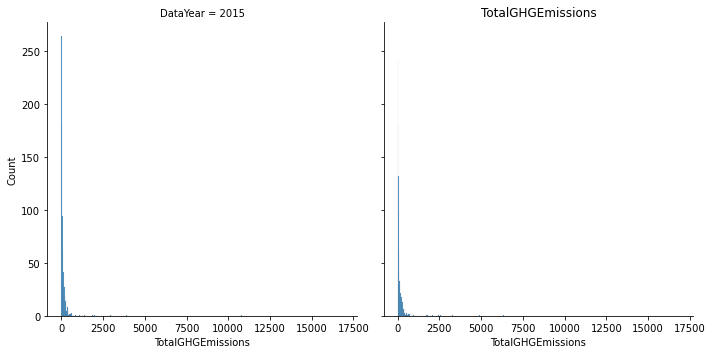

<Figure size 360x360 with 0 Axes>

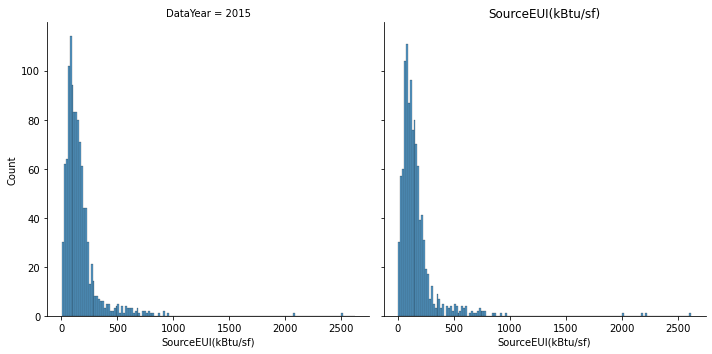

<Figure size 360x360 with 0 Axes>

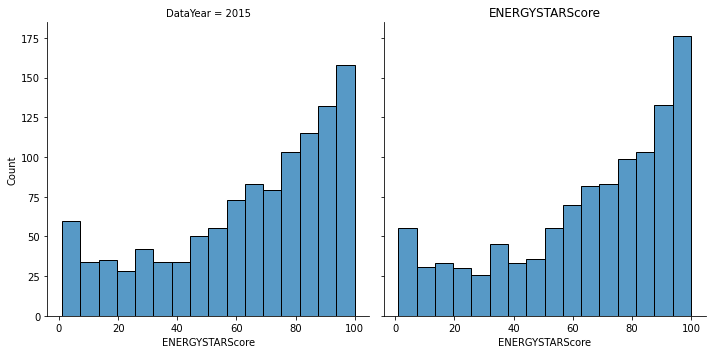

<Figure size 360x360 with 0 Axes>

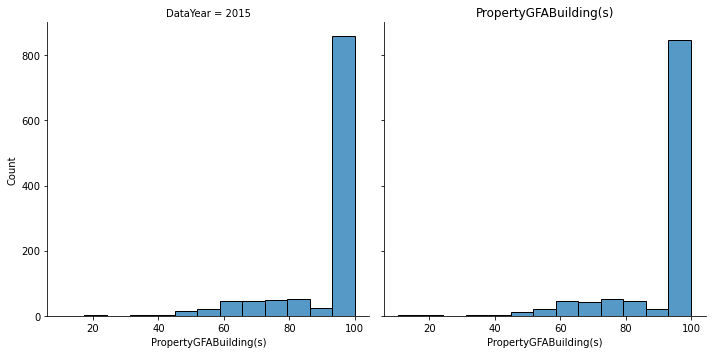

<Figure size 360x360 with 0 Axes>

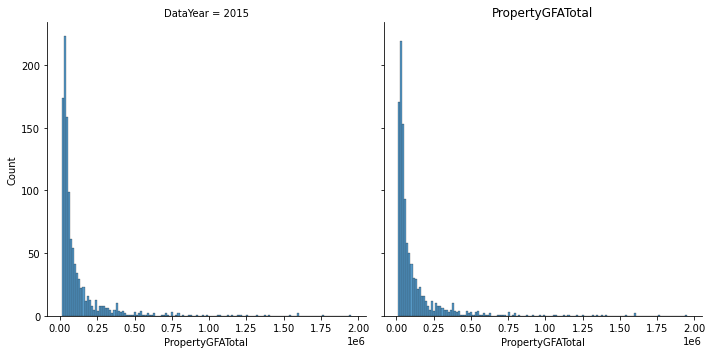

In [63]:
for col in num:
    fig = plt.figure(figsize=(5,5))
    sns.displot(x=energy[col],col='DataYear',data=energy)
    plt.title(col)
    

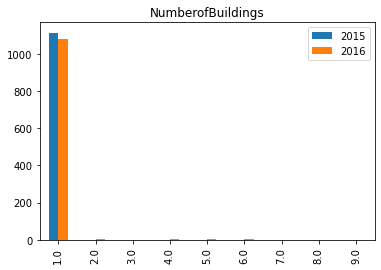

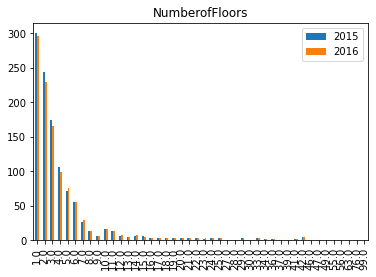

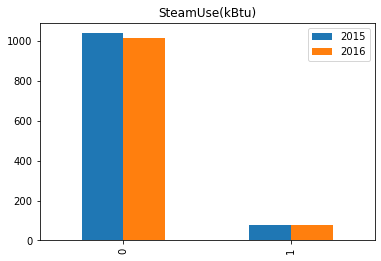

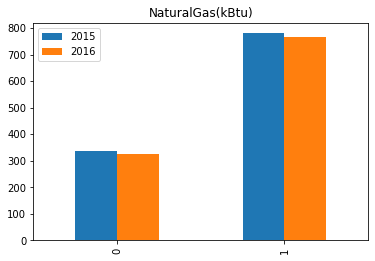

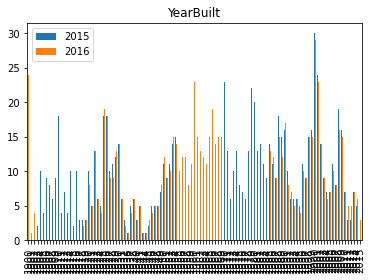

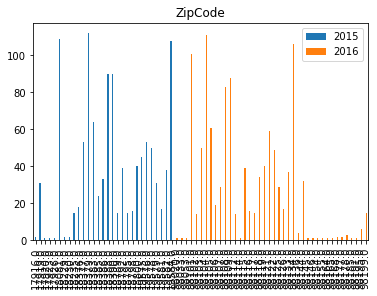

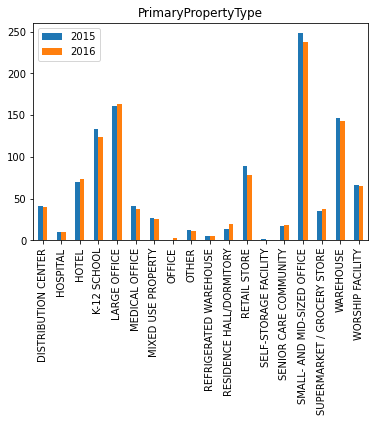

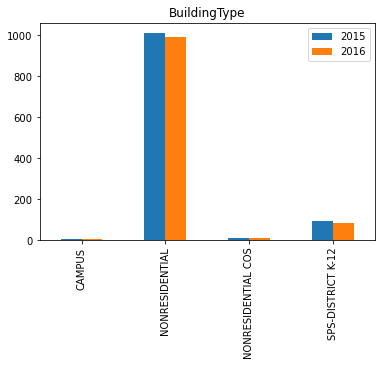

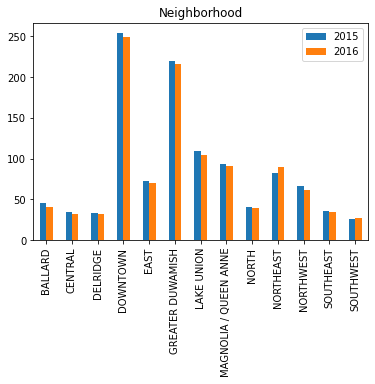

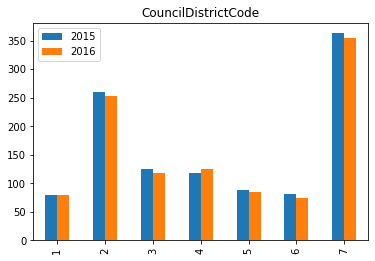

In [64]:

for col in qualitative + categorielle:
    d = {'2015': energy_2015[col].value_counts().sort_index(axis=0), '2016': energy_2016[col].value_counts().sort_index(axis=0)}
    data = pd.DataFrame(data=d)
    data.plot(kind='bar')
    plt.title(col)

On réaffiche les résultats pour les variable ZipCode et YearBuilt qui n'était pas très visibles

<AxesSubplot:>

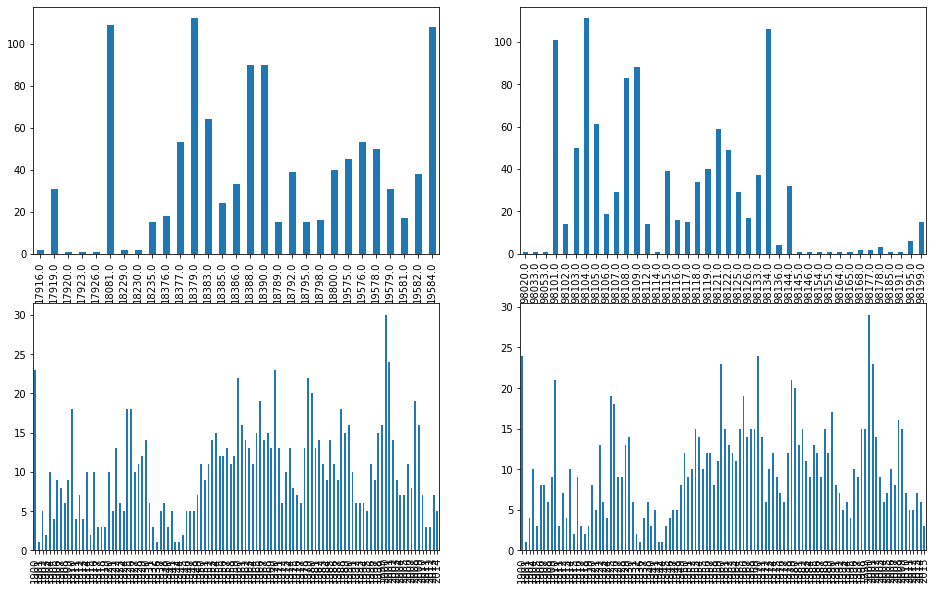

In [65]:
fig , axs = plt.subplots(2,2,figsize=(16,10))
energy[energy['DataYear']==2015]["ZipCode"].value_counts().sort_index(axis=0).plot(kind='bar',ax=axs[0,0])
energy[energy['DataYear']==2016]["ZipCode"].value_counts().sort_index(axis=0).plot(kind='bar',ax=axs[0,1])
energy[energy['DataYear']==2015]["YearBuilt"].value_counts().sort_index(axis=0).plot(kind='bar',ax=axs[1,0])
energy[energy['DataYear']==2016]["YearBuilt"].value_counts().sort_index(axis=0).plot(kind='bar',ax=axs[1,1])


On peut remarquer que la distrubution de toute les variables est très similaires entre les années 2015 et 2016 à l'exeption de la variable ZipCode , qui ne possède meme pas des valeurs similaires entre 2015 et 2016 , on va donc supprimer cette variable.

In [66]:
energy=energy.drop('ZipCode',1)
categorielle = categorielle[1 :]

C:\Users\pon\AppData\Local\Temp\ipykernel_16552\1365733139.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  energy=energy.drop('ZipCode',1)


On peut voir pour que nos deux variables target sont très écrasés sur la ligne d'ordonnée, pour résoudre le probleme nous allons essayer d'appliquer une ransformaation au log et voir si les données sont plus lisibles

In [67]:

energy['SourceEUI(kBtu/sf)']=np.log(energy['SourceEUI(kBtu/sf)']+1)
energy["TotalGHGEmissions"]=np.log(energy["TotalGHGEmissions"]+1)

<Figure size 360x360 with 0 Axes>

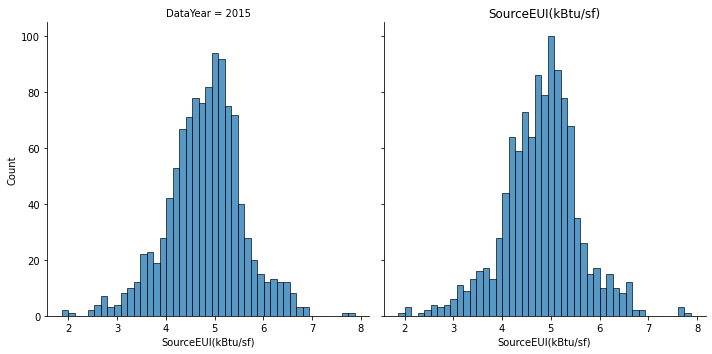

<Figure size 360x360 with 0 Axes>

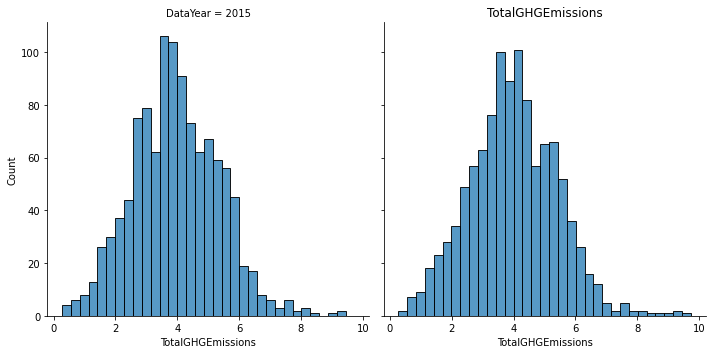

In [68]:
for col in ['SourceEUI(kBtu/sf)',"TotalGHGEmissions"]:
    fig = plt.figure(figsize=(5,5))
    sns.displot(x=energy[col],col='DataYear',data=energy)
    plt.title(col)
    

Apres transformation au log la distrubution des variables est proche de celle d'une loi normal et rendra donc nos modèles plus performant.

Les valeurs prisent par la variable NumberofBuildings étant quasiment toute égale à 1 , elle n'apportent que peu d'information pour les modèles que nous mettrons en place plus tard, on va donc la supprimé


In [69]:
energy.drop('NumberofBuildings',1,inplace=True)
qualitative=qualitative[1 :]

C:\Users\pon\AppData\Local\Temp\ipykernel_16552\4190989329.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  energy.drop('NumberofBuildings',1,inplace=True)


# Analyse multivariée

Pour notre analyse multivariée nous allons commencer par creet un scatterplot de nos variables target, en y affichant la répatition des variables catégorielles afin d'avoir une premiere visualistion de nos données

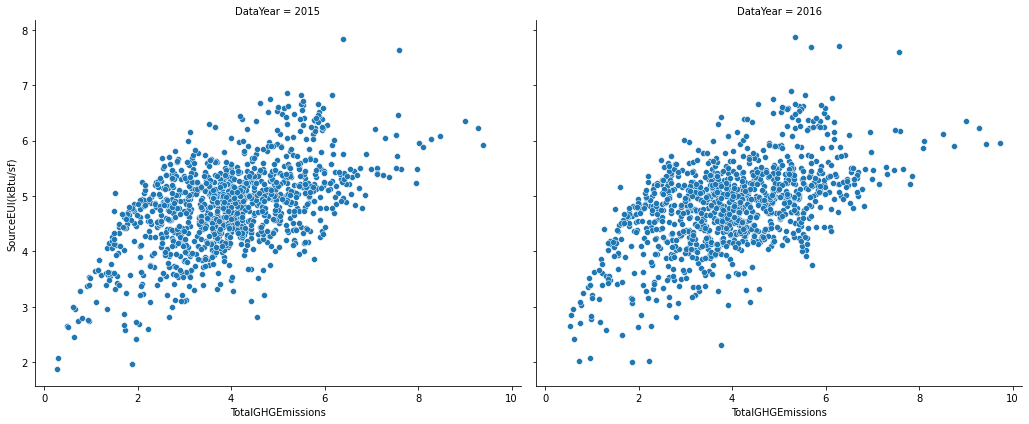

In [70]:
sns.relplot(x="TotalGHGEmissions",y='SourceEUI(kBtu/sf)',data=energy,col='DataYear',height=6,aspect=1.2,kind='scatter')


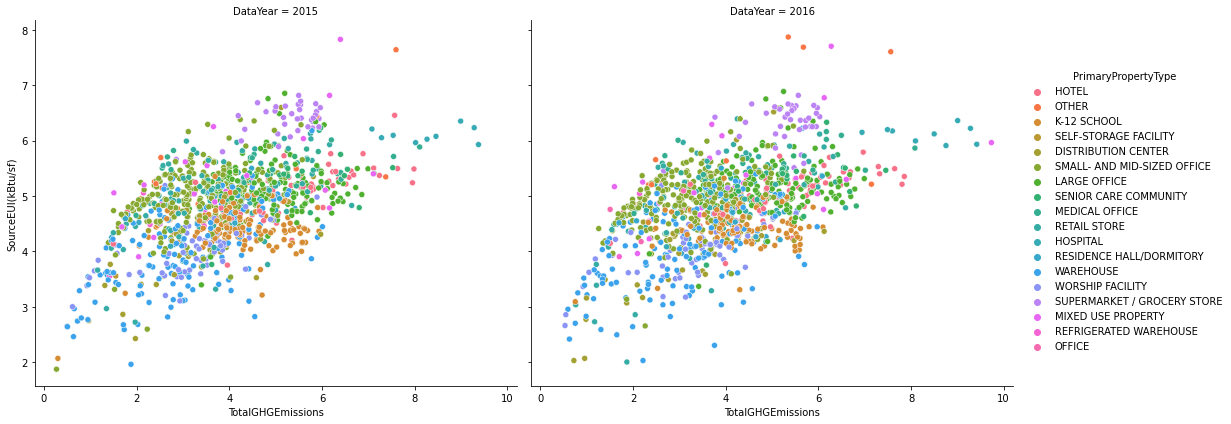

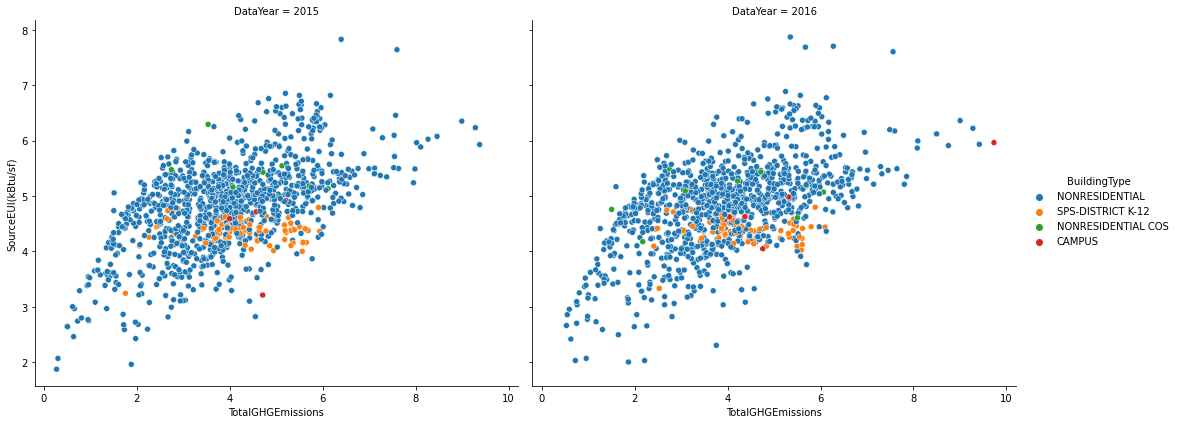

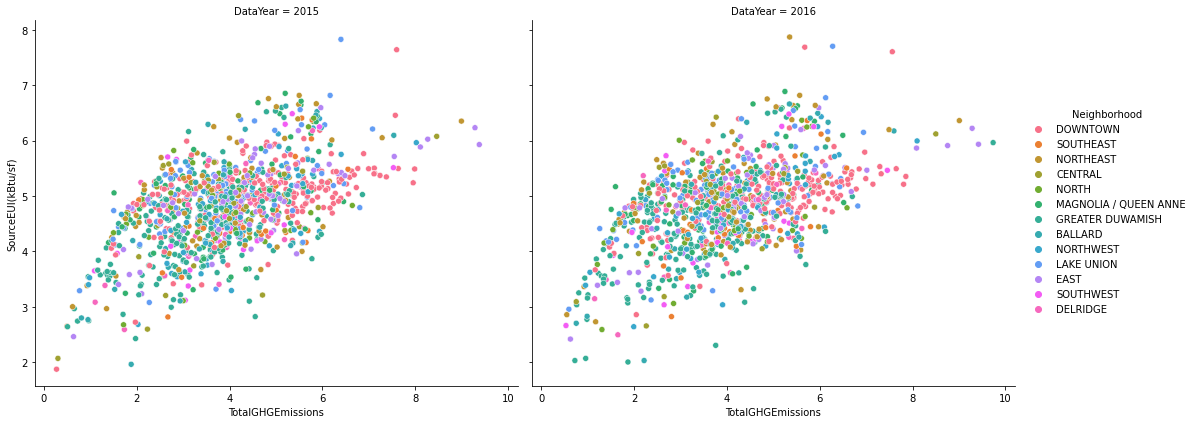

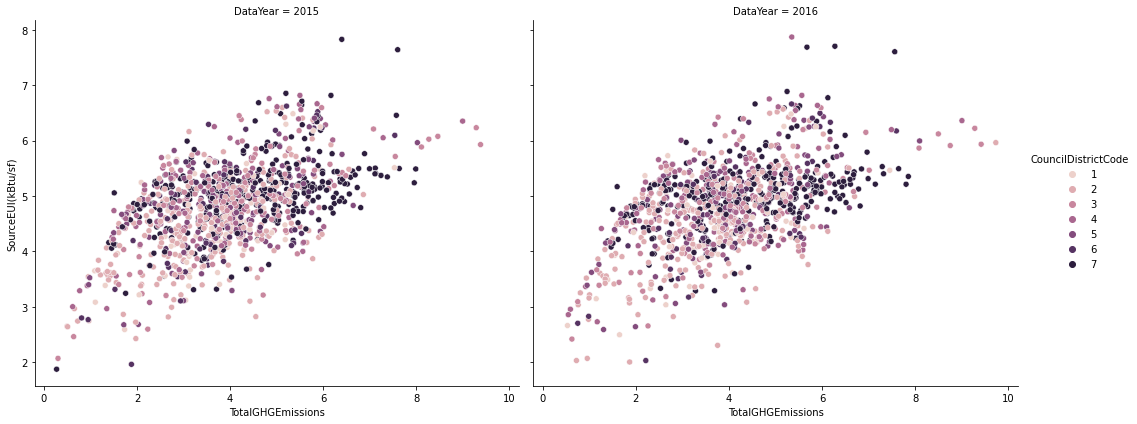

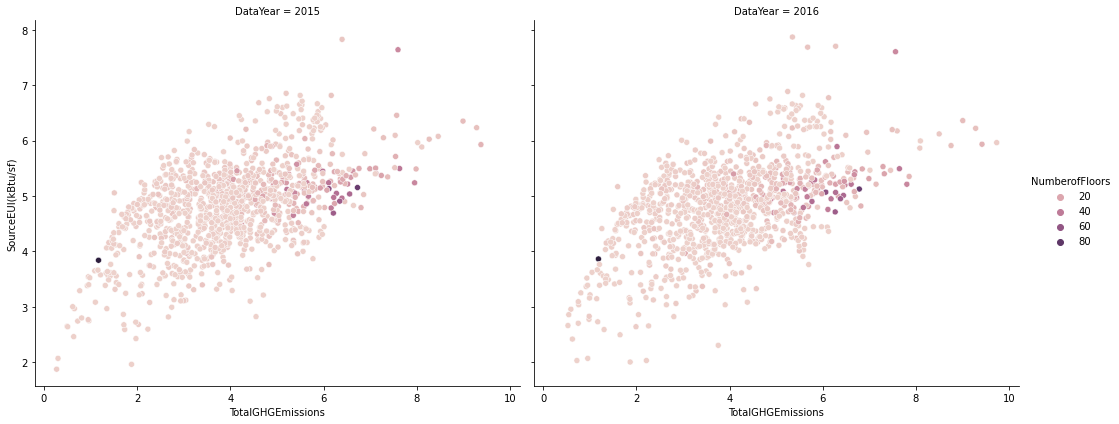

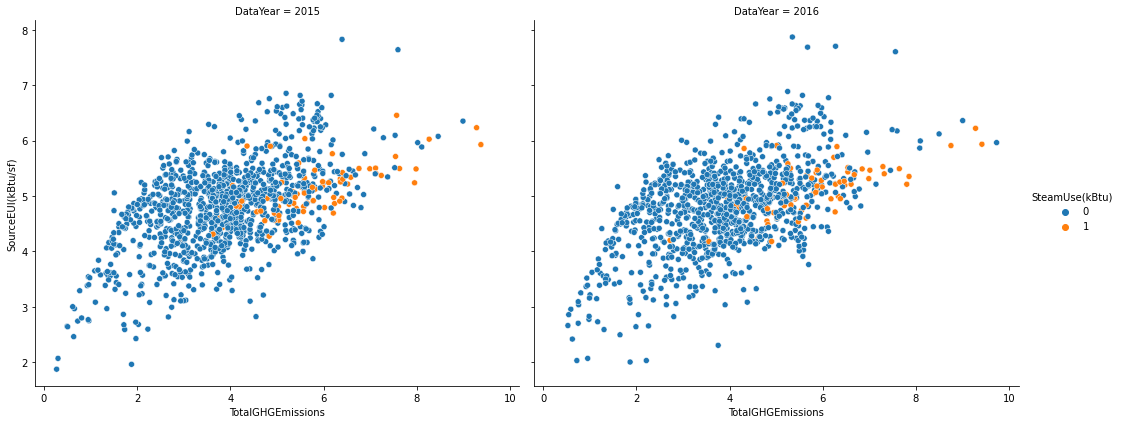

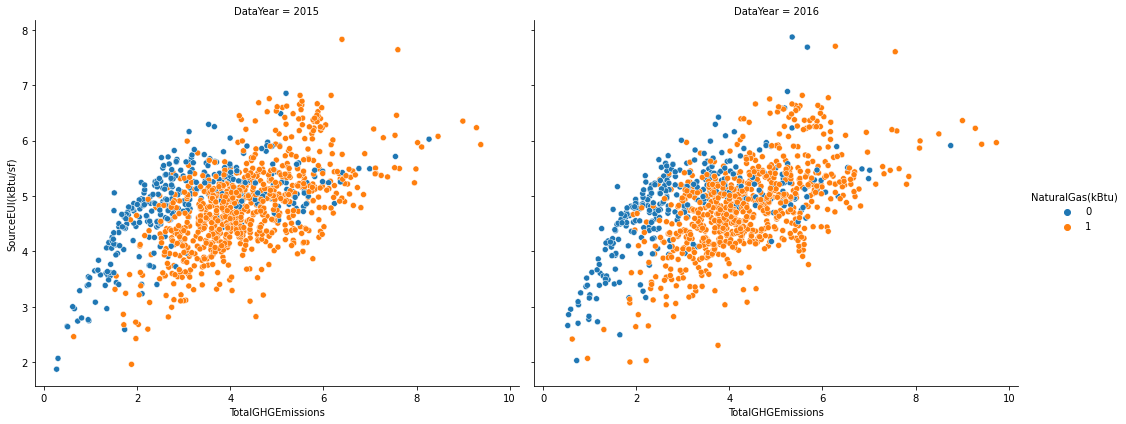

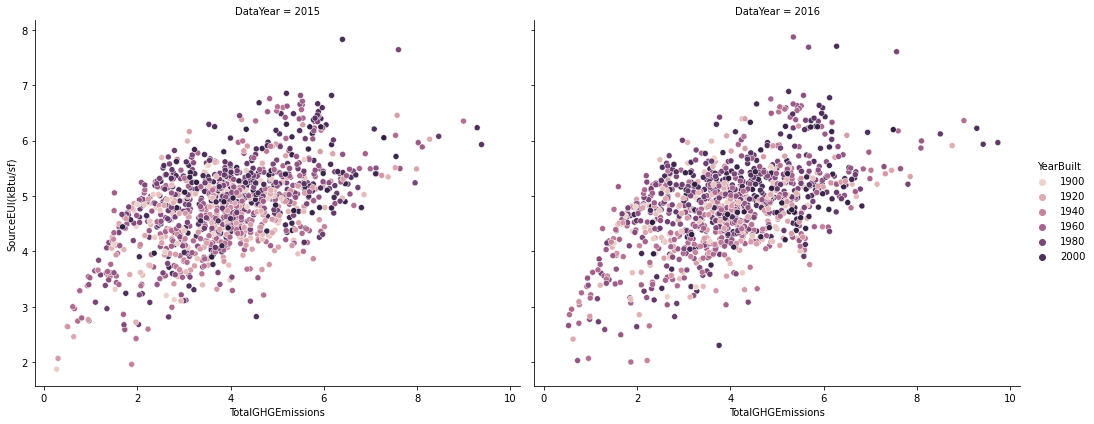

In [71]:
for col in categorielle + qualitative:
    sns.relplot(x="TotalGHGEmissions",y='SourceEUI(kBtu/sf)',data=energy,hue=col,col='DataYear',height=6,aspect=1.2,kind='scatter')

Toujours dans un but de visualisation , nous allons afficher des scatterplot de chacune de nos variables numérique avec nos target

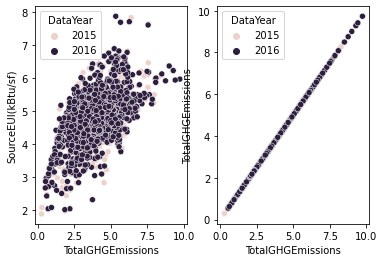

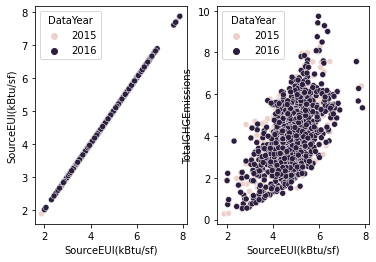

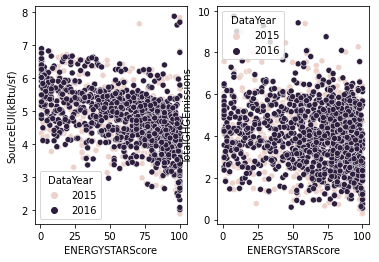

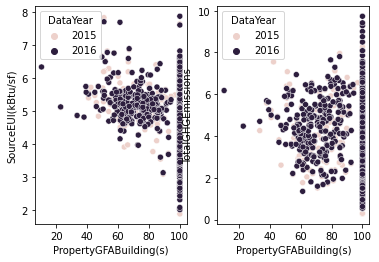

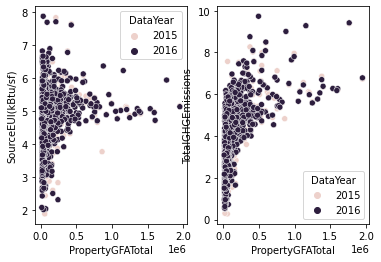

In [72]:
for col in num:
    fig, axs = plt.subplots(1,2)
    sns.scatterplot(x=col,y='SourceEUI(kBtu/sf)',data=energy,hue='DataYear',ax=axs[0])
    sns.scatterplot(x=col,y='TotalGHGEmissions',data=energy,hue='DataYear',ax=axs[1])

Nous allons maintenant afficher la matrice de corrélation des variabl,pour ameliorer les performances des modeles d'aprentissage que nous mettront en place nous voulons eviter d'avoir des variables trop fortement corrélés.
Pour cela nous allons fixé un seuil à 75% de corrélation

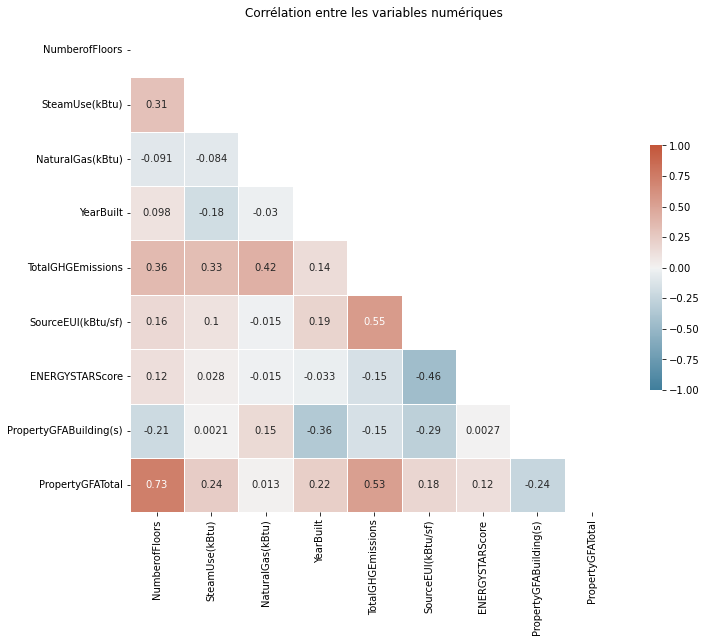

In [73]:

corr = energy[energy['DataYear']==2016][qualitative + num].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1,vmin=(-1), center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot = True)
plt.title('Corrélation entre les variables numériques')


La seul valeur superieur à 0.75 la corrélation est entre les variables PropertyGFATotal et NumberofFloors.

On va donc diviser la valeur de PropertyGFATotal par le nombre d'etage afin d'obtenir une variable PropertyGFAFloor

On verifie ensuite l'impact sur note matrice de corrélation

In [74]:
energy['PropertyGFATotal']=energy['PropertyGFATotal']/energy['NumberofFloors']

Text(0.5, 1.0, 'Corrélation entre les variables numériques')

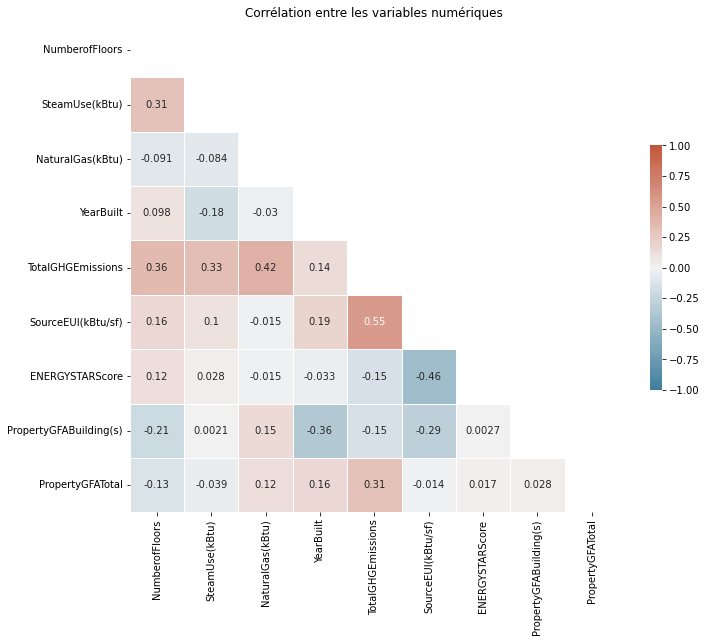

In [75]:
corr = energy[energy['DataYear']==2016][qualitative + num].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1,vmin=(-1), center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot = True)
plt.title('Corrélation entre les variables numériques')

Nous allons maintenant afficher des barplots de nos targets pour chacune des variables catégorielle

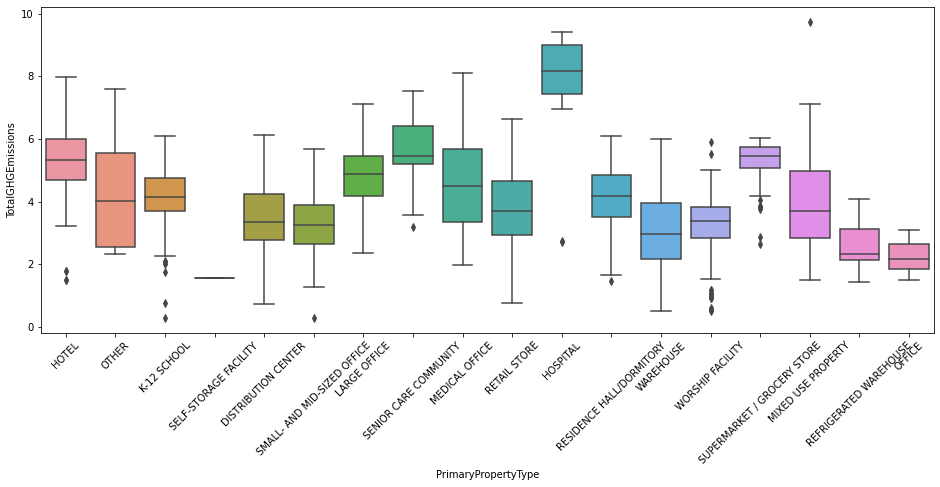

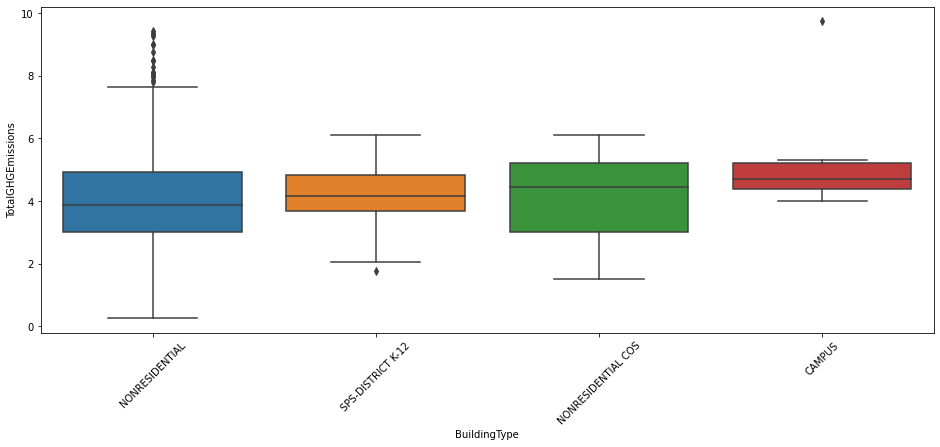

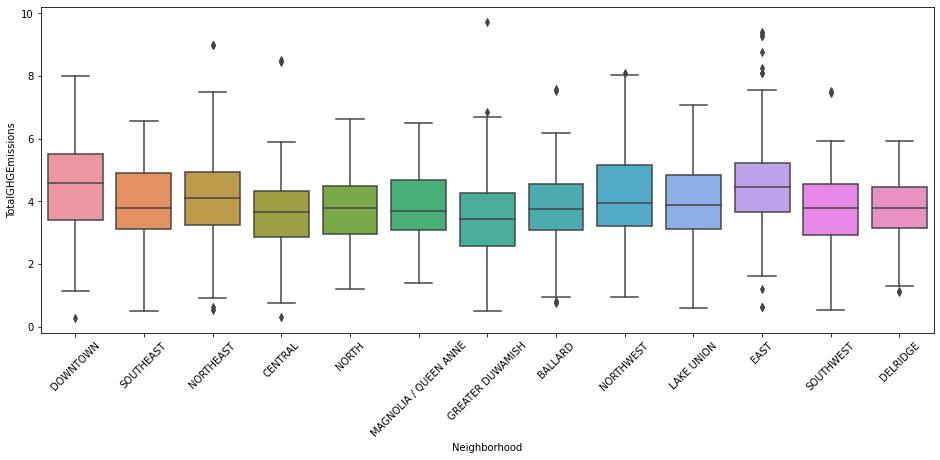

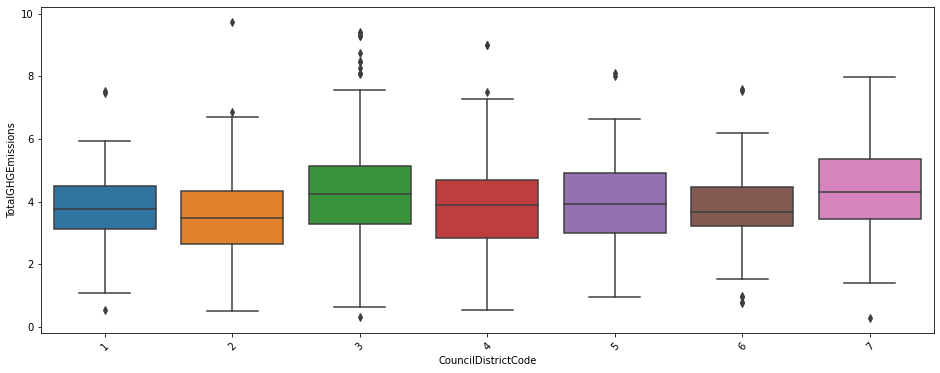

In [76]:
for col in categorielle:
    fig = plt.figure(figsize=(16,6))
    sns.boxplot(x=col,y="TotalGHGEmissions",data=energy)
    plt.xticks(rotation = 45) 

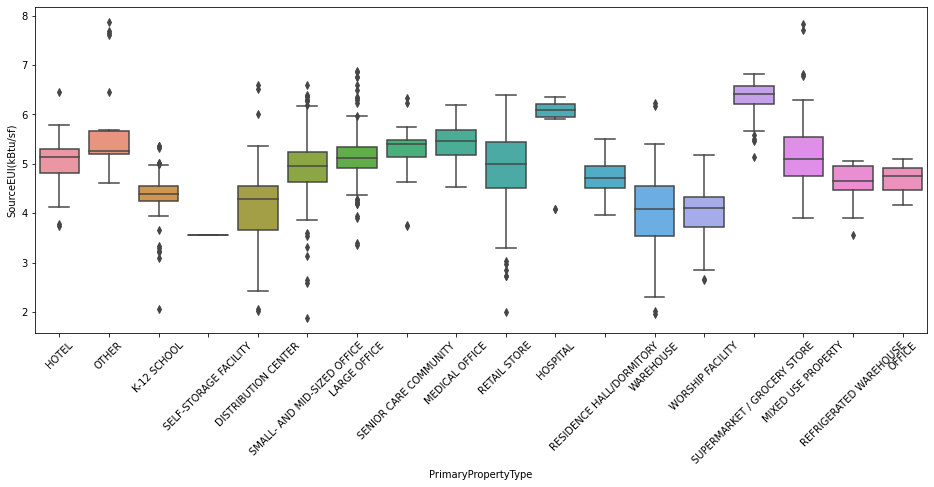

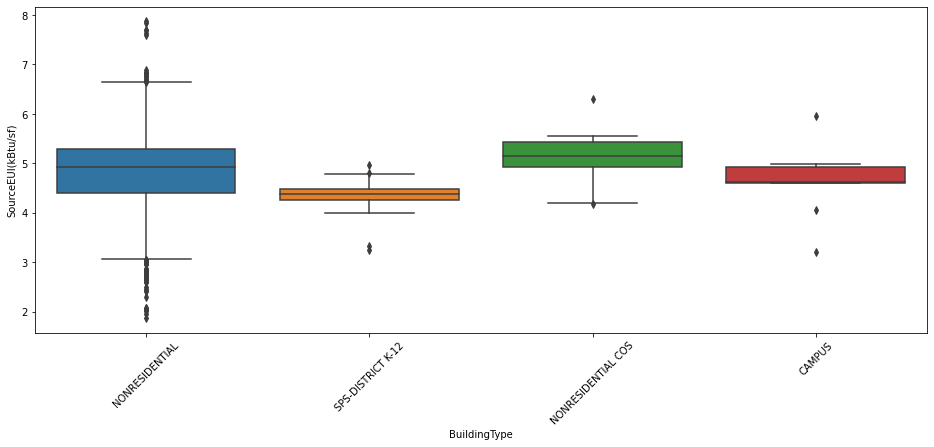

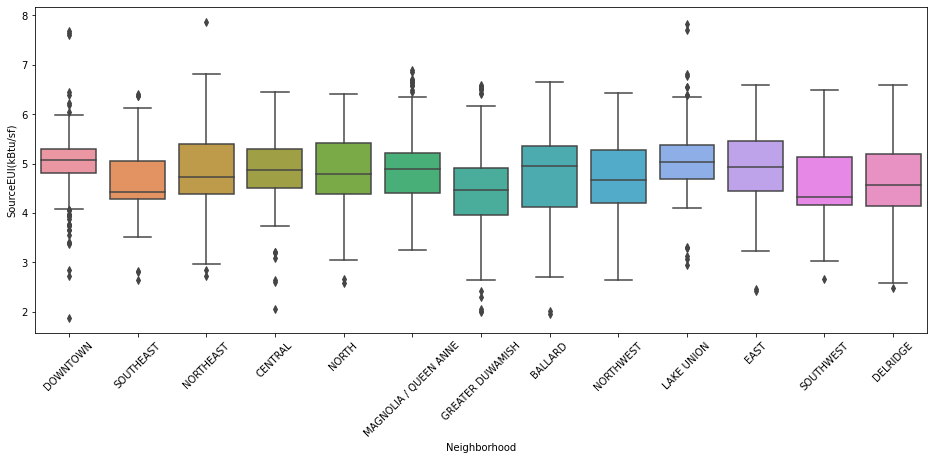

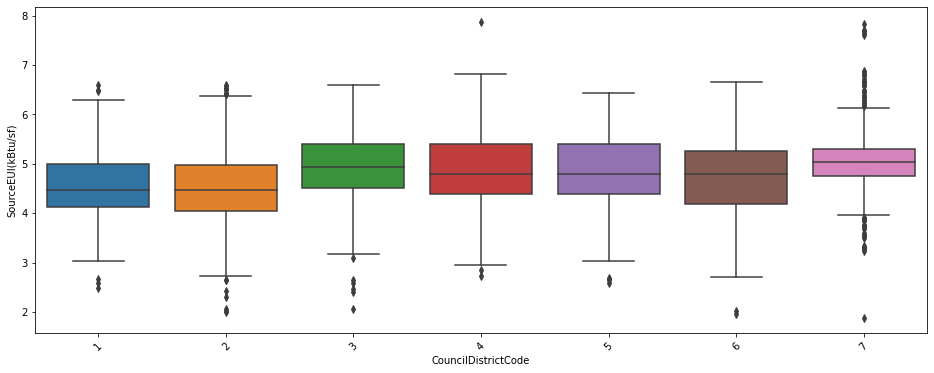

In [77]:
for col in categorielle:
    fig = plt.figure(figsize=(16,6))
    sns.boxplot(x=col,y='SourceEUI(kBtu/sf)',data=energy)
    plt.xticks(rotation = 45) 

Les differences entre les catégories des variables 'Neighborhood' , 'CouncilDistrictCode' et 'BuildingType' semblent faible , nous allons donc effectuer un test de Anova de ces variables avec nos target pour pouvoir reheter l'hypothese d'independance.

In [78]:
stats.f_oneway(*[energy["TotalGHGEmissions"][energy['Neighborhood']==item] for item in energy['Neighborhood'].unique()])


F_onewayResult(statistic=15.022909713723983, pvalue=8.600221068909361e-31)

In [79]:
stats.f_oneway(*[energy["TotalGHGEmissions"][energy['BuildingType']==item] for item in energy['BuildingType'].unique()])


F_onewayResult(statistic=3.74934366660956, pvalue=0.010584375269169317)

In [80]:
stats.f_oneway(*[energy["TotalGHGEmissions"][energy['CouncilDistrictCode']==item] for item in energy['CouncilDistrictCode'].unique()])


F_onewayResult(statistic=25.009390646731973, pvalue=7.666177009402336e-29)

In [81]:
stats.f_oneway(*[energy['SourceEUI(kBtu/sf)'][energy['Neighborhood']==item] for item in energy['Neighborhood'].unique()])

F_onewayResult(statistic=18.15353502022505, pvalue=6.736805182870808e-38)

In [82]:
stats.f_oneway(*[energy['SourceEUI(kBtu/sf)'][energy['BuildingType']==item] for item in energy['BuildingType'].unique()])


F_onewayResult(statistic=20.734591910185877, pvalue=3.0180710420521957e-13)

In [83]:
stats.f_oneway(*[energy['SourceEUI(kBtu/sf)'][energy['CouncilDistrictCode']==item] for item in energy['CouncilDistrictCode'].unique()])


F_onewayResult(statistic=32.60466421572639, pvalue=8.335594708910022e-38)

Toutes nos pvalue étant inferieur à 0.05 on peut rejeter l'hypothese d'indepance dans chaque cas et donc on utilisera ces variables dans nos modèles d'aprentissage

On va maintenant sauvegarder notre Dataframe nettoyer et pour l'utiliser dans notre notebook de machine learning

In [84]:
energy=energy.drop('index',1)

C:\Users\pon\AppData\Local\Temp\ipykernel_16552\745612267.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  energy=energy.drop('index',1)


In [85]:
energy.to_csv('energy_clean.csv',sep='\t',index=False)